# Spam Detection Using Baseline Machine Learning Models

**Objective:** To Classify messages as spam or ham using machine learning.

**Dataset:** SpamAssassin Public Corpus (folder of spam and ham emails).

**Models:** 
- Decision Tree
- Support Vector Machine (SVM)
- Multilayer Perceptron (MLP)

**Evaluation Metrics:** Accuracy, Precision, Recall, F1-score


In [15]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Defining folders
spam_dir = r'C:\Users\User\Desktop\Joy Master Dissertation\20021010_spam\spam'
ham_dir = r'C:\Users\User\Desktop\Joy Master Dissertation\20021010_easy_ham\easy_ham'

# Function to read emails
def load_emails(folder, label):
    emails = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with open(filepath, 'r', encoding='latin-1') as f:
            content = f.read()
        emails.append([content, label])
    return emails

# Loading spam and ham emails
spam_emails = load_emails(spam_dir, 1)  # 1 = spam
ham_emails = load_emails(ham_dir, 0)    # 0 = ham

# Combining into DataFrame
data = pd.DataFrame(spam_emails + ham_emails, columns=['message', 'label'])
print(data.head())
print("Total messages:", len(data))


                                             message  label
0  mv 1 00001.bfc8d64d12b325ff385cca8d07b84288\nm...      1
1  From 12a1mailbot1@web.de  Thu Aug 22 13:17:22 ...      1
2  From ilug-admin@linux.ie  Thu Aug 22 13:27:39 ...      1
3  From sabrina@mx3.1premio.com  Thu Aug 22 14:44...      1
4  From wsup@playful.com  Thu Aug 22 16:17:00 200...      1
Total messages: 3052


In [17]:
# Spliting dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42, stratify=data['label']
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
# Creating a comparison table
import pandas as pd

comparison = pd.DataFrame({
    model: {
        "Accuracy": results[model]['accuracy'],
        "Precision (spam)": results[model]['1']['precision'],
        "Recall (spam)": results[model]['1']['recall'],
        "F1-score (spam)": results[model]['1']['f1-score']
    } for model in results
}).T

comparison

,Accuracy,Precision (spam),Recall (spam),F1-score (spam)
SVM,0.996727,1.00,0.98,0.989899
Decision Tree,0.993453,0.98,0.98,0.980000
MLP,0.998363,1.00,0.99,0.994975


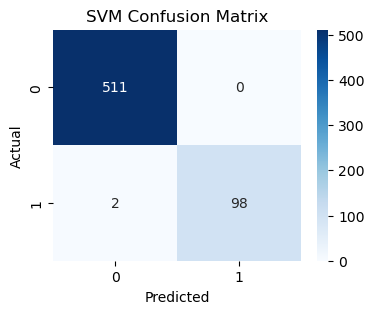

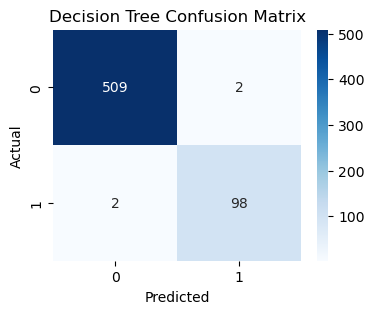

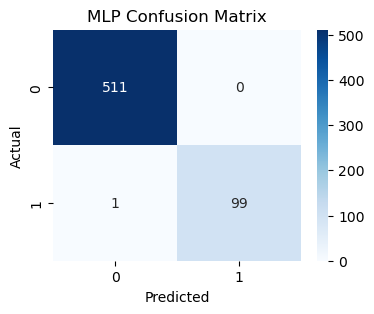

In [18]:
# Initializing models
models = {
    "SVM": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Training, predicting, and evaluating
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    results[name] = classification_report(y_test, y_pred, output_dict=True)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [19]:
# Performance comparison table
comparison = pd.DataFrame({
    model: {
        "Accuracy": results[model]['accuracy'],
        "Precision (spam)": results[model]['1']['precision'],
        "Recall (spam)": results[model]['1']['recall'],
        "F1-score (spam)": results[model]['1']['f1-score']
    } for model in results
}).T

comparison

,Accuracy,Precision (spam),Recall (spam),F1-score (spam)
SVM,0.996727,1.00,0.98,0.989899
Decision Tree,0.993453,0.98,0.98,0.980000
MLP,0.998363,1.00,0.99,0.994975


## Insights

- Which model performs best overall?  
- Which model has the highest precision/recall for spam detection?  
- Trade-offs: e.g., SVM might have better accuracy, MLP may take longer to train.  
- Potential improvements: hyperparameter tuning, ensemble methods, larger datasets.

In [21]:
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Ensemble Models for Spam Detection

## Objective
To improve spam detection performance by combining multiple base models (Decision Tree, SVM, MLP) using ensemble techniques.

## Methods
1. **Voting Classifier**  
   - Combines predictions from all base models using **hard voting**.  
   - The final prediction is the class most predicted by the individual models.  

2. **Stacking Classifier**  
   - Uses the same base models, but a **meta-learner (Logistic Regression)** learns how to best combine their predictions.  
   - This often improves accuracy and generalization.

## Evaluation Metrics
- Accuracy
- Precision (spam)
- Recall (spam)
- F1-score (spam)
- Confusion matrix visualizations

## Insights
- Compare baseline models with ensemble models.
- Highlight which model performs best for detecting spam messages.
- Discuss trade-offs (e.g., training time vs. accuracy).
- Suggest potential improvements (hyperparameter tuning, larger datasets, more advanced ensemble methods).

Voting Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      0.98      0.99       100

    accuracy                           1.00       611
   macro avg       1.00      0.99      0.99       611
weighted avg       1.00      1.00      1.00       611



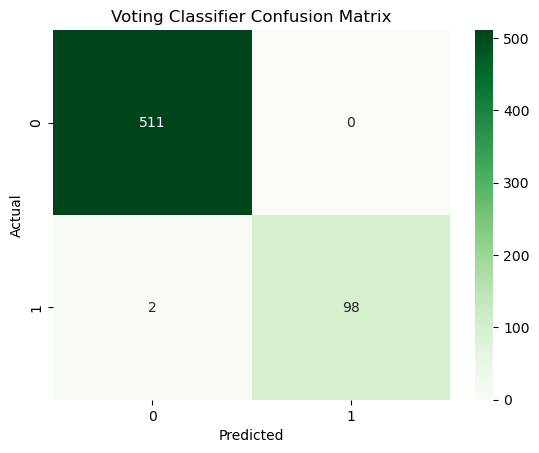

In [25]:
# Initializing base models
dt = DecisionTreeClassifier(random_state=42)
svm_model = LinearSVC()
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Voting Classifier (hard voting)
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('svm', svm_model), ('mlp', mlp)],
    voting='hard'
)

# Training Voting Classifier
voting_clf.fit(X_train_tfidf, y_train)

# Predicting & evaluating
y_pred_voting = voting_clf.predict(X_test_tfidf)
print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Stacking Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       511
           1       1.00      0.98      0.99       100

    accuracy                           1.00       611
   macro avg       1.00      0.99      0.99       611
weighted avg       1.00      1.00      1.00       611



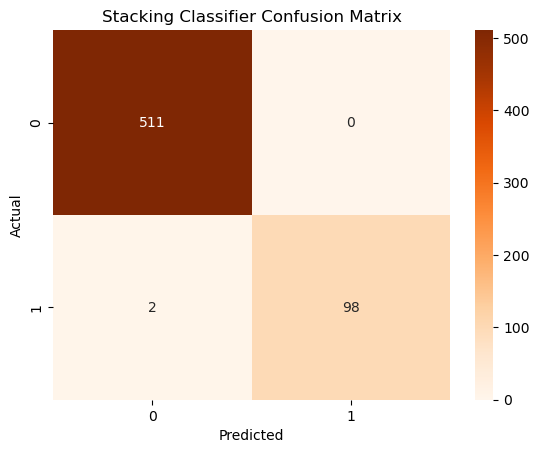

In [23]:
# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('svm', svm_model), ('mlp', mlp)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# Training Stacking Classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Predict & evaluate
y_pred_stacking = stacking_clf.predict(X_test_tfidf)
print("Stacking Classifier Performance:")
print(classification_report(y_test, y_pred_stacking))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Stacking Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Adding baseline results for reference
results['Voting'] = classification_report(y_test, y_pred_voting, output_dict=True)
results['Stacking'] = classification_report(y_test, y_pred_stacking, output_dict=True)

# Creating a comparison table
comparison = pd.DataFrame({
    model: {
        "Accuracy": results[model]['accuracy'],
        "Precision (spam)": results[model]['1']['precision'],
        "Recall (spam)": results[model]['1']['recall'],
        "F1-score (spam)": results[model]['1']['f1-score']
    } for model in results
}).T

comparison

,Accuracy,Precision (spam),Recall (spam),F1-score (spam)
SVM,0.996727,1.00,0.98,0.989899
Decision Tree,0.993453,0.98,0.98,0.980000
MLP,0.998363,1.00,0.99,0.994975
Voting,0.996727,1.00,0.98,0.989899
Stacking,0.996727,1.00,0.98,0.989899


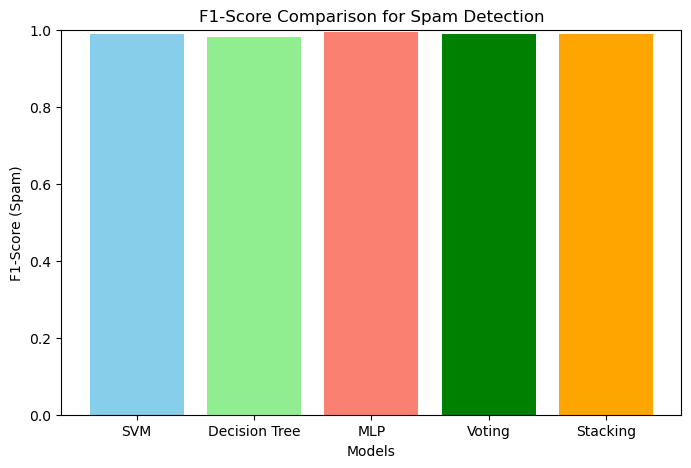

In [26]:
import matplotlib.pyplot as plt

# Extract F1-score for spam class from results
f1_scores = {model: results[model]['1']['f1-score'] for model in results}

# Plot
plt.figure(figsize=(8,5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['skyblue','lightgreen','salmon','green','orange'])
plt.ylim(0,1)
plt.title('F1-Score Comparison for Spam Detection')
plt.ylabel('F1-Score (Spam)')
plt.xlabel('Models')
plt.show()